In [235]:
# Importing libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# !pip install yfinance
import yfinance as yf
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance
from scipy.cluster import hierarchy
import math

### Question 1: PCA

In [236]:
# 1.1 Give a qualitative description of Principal Component Analysis (PCA) and its applications in machine learning.
# Why might it be useful to consider PCA to transform a set of explanatory variables?

In [237]:
# 1.2 Write down the mathematical equations for PCA explaining how one transforms the raw input data matrix X into a new set of variables. 
# Give an interpretation of each matrix.

In [238]:
# 1.3 Use at least one year of daily returns to calculate the correlation matrix for the 30 stocks that are constituents of the Dow Jones Index. 
# Matlab’s “BlueChipStockMoments” can be used to calculate the correlation matrix. 
# Use this correlation matrix for PCA and construct bar graphs to show the weight of each stock for the first and second principal components. 
# Is the first or second principal component similar to the market (equal weight on each stock)? Discuss why?

#  Loading the Dow Jones Index (BeautifulSoup dataset)
financeData = yf.download("AMGN HON CRM DOW WBA AAPL NKE GS V UNH CSCO TRV CVX VZ HD MSFT INTC JNJ WMT DIS CAT JPM BA KO MCD AXP IBM MRK MMM PG", start = "2021-01-01", end = "2022-01-01")
financeData

[*********************100%***********************]  30 of 30 completed


Adj Close                                                  \
                  AAPL        AMGN         AXP          BA         CAT   
Date                                                                     
2021-01-04  127.874969  213.126587  115.185814  202.720001  174.324921   
2021-01-05  129.455948  214.160904  115.800575  211.630005  175.750916   
2021-01-06  125.098274  219.323105  120.084435  211.029999  185.531860   
2021-01-07  129.367035  220.047150  119.134567  212.710007  185.885956   
2021-01-08  130.483643  224.250259  119.252068  209.899994  185.914688   
...                ...         ...         ...         ...         ...   
2021-12-27  179.289459  218.275620  162.285141  203.169998  201.640167   
2021-12-28  178.255432  218.857269  162.304886  206.130005  201.874619   
2021-12-29  178.344925  220.631226  161.732330  203.660004  202.568314   
2021-12-30  177.171738  219.535828  162.058105  202.710007  201.347031   
2021-12-31  176.545380  218.081757  161.505264  201.320007  201.991867   

                                                                      ...  \
                   CRM       CSCO         CVX         DIS        DOW  ...   
Date                                                                  ...   
2021-01-04  220.309998  41.743755   77.692513  177.679993  49.205650  ...   
2021-01-05  221.520004  41.762745   79.792809  178.440002  50.808201  ...   
2021-01-06  216.149994  42.161575   82.360863  179.119995  53.202927  ...   
2021-01-07  217.979996  42.693344   82.746056  178.580002  53.275764  ...   
2021-01-08  222.039993  42.788300   83.534813  178.690002  53.002605  ...   
...                ...        ...         ...         ...        ...  ...   
2021-12-27  258.299988  61.489910  114.659752  152.800003  53.168571  ...   
2021-12-28  255.449997  61.596561  114.437737  155.199997  53.891823  ...   
2021-12-29  254.539993  62.013481  113.848953  154.869995  54.301033  ...   
2021-12-30  255.330002  61.683826  113.347031  155.929993  54.034569  ...   
2021-12-31  254.130005  61.441437  113.269814  154.889999  53.977474  ...   

              Volume                                                           \
                 MRK      MSFT      NKE        PG      TRV      UNH         V   
Date                                                                            
2021-01-04  10502637  37130100  6178500   8330900  1559700  4203800  10318300   
2021-01-05  10956526  23823000  4163100   6856400   937700  3160500   6869700   
2021-01-06  10521396  35930700  6072900  10578000  1278900  6561400   7206200   
2021-01-07  10447931  27694500  5256900   7355400  1258100  3366700  10967900   
2021-01-08   9563105  22956200  3950500   7448500   995100  2947800   6513000   
...              ...       ...      ...       ...      ...      ...       ...   
2021-12-27   6334700  19947000  3769300   4548600   655100  1349400   4818400   
2021-12-28   5727100  15661500  2658600   5929400   914500  1495500   4279800   
2021-12-29   5926100  15042000  3830900   5346100   683400  1573900   3223100   
2021-12-30   5859100  15994500  2666800   5911500   420400  1309800   3812800   
2021-12-31   6019500  18000800  2752000   5327000   682400  1695400   4723300   

                                          
                  VZ       WBA       WMT  
Date                                      
2021-01-04  19129800   9101800  10727400  
2021-01-05  16220000   7431000   8832700  
2021-01-06  22678500  12503300   7306300  
2021-01-07  19079900  15553600   6846000  
2021-01-08  28411600   9895400   8159400  
...              ...       ...       ...  
2021-12-27  19705800   5219200   5346900  
2021-12-28  12126500   3736100   5261000  
2021-12-29  15109500   5117300   4348400  
2021-12-30  15615500   3653600   4983000  
2021-12-31  15911400   3406700   5982600  

[252 rows x 180 columns]

In [239]:
# Calculate the correlation matrix for the 30 stocks that are constituents of the Dow Jones Index
dailyReturns = financeData['Adj Close'].pct_change()  # DAILY RETURNS
adjCloseCorr = dailyReturns.corr()
adjCloseCorr

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
AAPL,1.000000,0.252390,0.105706,0.223581,0.054492,0.389548,0.373999,0.089272,0.127567,0.136439,...,0.008655,0.679083,0.257748,0.109688,0.147923,0.188535,0.303719,-0.113115,0.108142,0.263576
AMGN,0.252390,1.000000,0.123892,0.103702,0.235513,0.059566,0.366451,0.178912,0.154349,0.217754,...,0.325434,0.260746,0.144881,0.376771,0.276297,0.345912,0.167679,0.318102,0.266281,0.245632
AXP,0.105706,0.123892,1.000000,0.526504,0.581928,0.217572,0.270257,0.591816,0.522298,0.548294,...,0.033589,0.120093,0.227145,0.112693,0.572956,0.297626,0.504562,0.215399,0.194599,0.101883
BA,0.223581,0.103702,0.526504,1.000000,0.487189,0.239144,0.195605,0.494365,0.440014,0.471220,...,-0.028556,0.181608,0.189605,-0.012244,0.368907,0.077652,0.318465,0.088447,0.296689,0.185225
CAT,0.054492,0.235513,0.581928,0.487189,1.000000,0.075779,0.265908,0.591077,0.435306,0.677111,...,0.193247,0.003077,0.130650,0.123307,0.519389,0.276988,0.282905,0.266923,0.322035,0.230741
CRM,0.389548,0.059566,0.217572,0.239144,0.075779,1.000000,0.273749,0.110560,0.203393,0.115377,...,-0.003952,0.521853,0.231073,0.056685,0.037507,0.057035,0.326904,-0.002913,0.043288,0.181541
CSCO,0.373999,0.366451,0.270257,0.195605,0.265908,0.273749,1.000000,0.294728,0.317620,0.331573,...,0.155729,0.433069,0.267489,0.387358,0.383348,0.326664,0.357110,0.275467,0.285702,0.264129
CVX,0.089272,0.178912,0.591816,0.494365,0.591077,0.110560,0.294728,1.000000,0.348401,0.672391,...,0.168018,0.080991,0.172854,0.133385,0.488462,0.237787,0.309632,0.312077,0.265352,0.173752
DIS,0.127567,0.154349,0.522298,0.440014,0.435306,0.203393,0.317620,0.348401,1.000000,0.392452,...,0.051897,0.180568,0.240212,0.158798,0.394403,0.210408,0.499145,0.229329,0.181589,0.124113
DOW,0.136439,0.217754,0.548294,0.471220,0.677111,0.115377,0.331573,0.672391,0.392452,1.000000,...,0.098655,0.034021,0.209004,0.116155,0.503711,0.207661,0.294205,0.305738,0.347113,0.252353


In [240]:
# USING THE corr matrix FOR PCA
twoCompPCA = PCA(n_components = 2)                                # PCA MODEL CONSTRUCTION
adjCloseTwoCompPCA = twoCompPCA.fit_transform(adjCloseCorr)       # TRAINING

adjCloseTwoCompPCAdf = pd.DataFrame(data = adjCloseTwoCompPCA, columns = ['PC1', 'PC2'])   # RESULTS IN DATAFRAME
adjCloseTwoCompPCAdf['Stocks'] = dailyReturns.columns                                      # ADDING RETURNS TO DF
adjCloseTwoCompPCAdf

,PC1,PC2,Stocks
0,-0.909285,0.787330,AAPL
1,-0.611014,-0.457397,AMGN
2,0.888351,0.275439,AXP
3,0.616193,0.617674,BA
4,0.978792,-0.024247,CAT
5,-0.734833,0.912961,CRM
6,-0.254457,-0.062344,CSCO
7,0.853008,0.002463,CVX
8,0.397618,0.341980,DIS
9,0.955425,0.029751,DOW


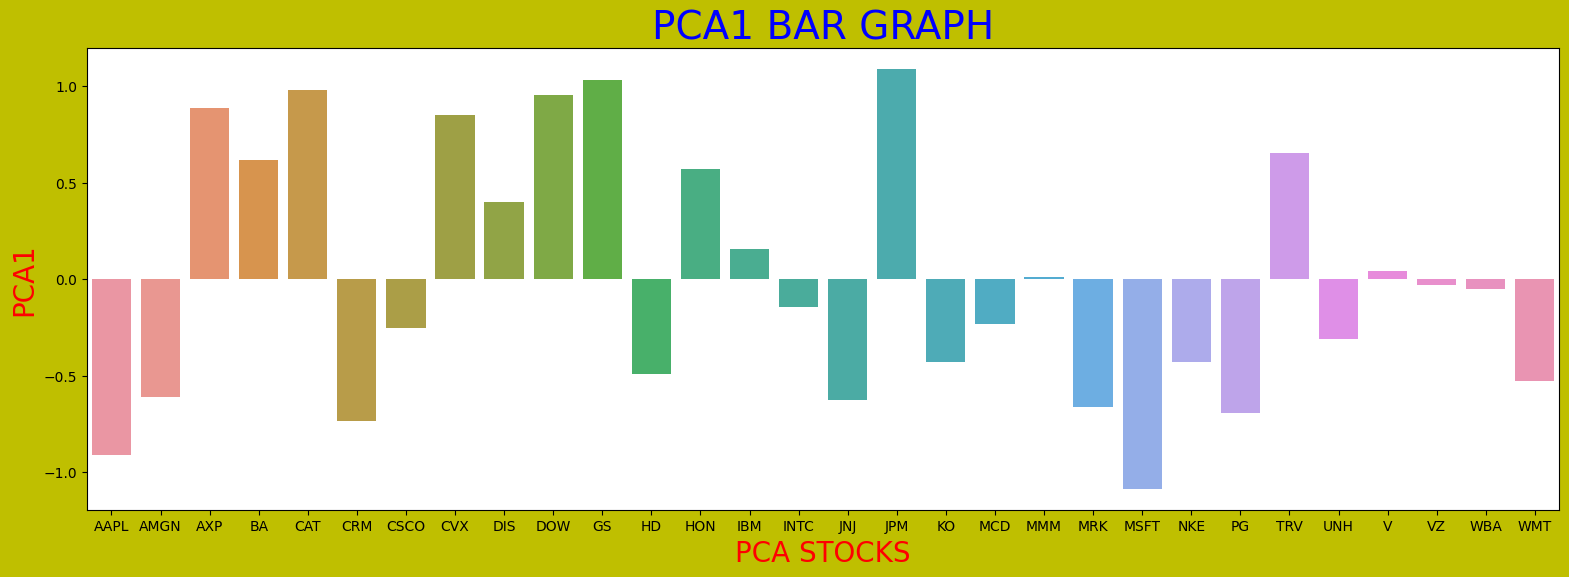

In [241]:
# PLOTTING PCA1
plt.rcParams['figure.figsize'] = (19, 6)
sns.barplot(x = adjCloseTwoCompPCAdf['Stocks'], y = adjCloseTwoCompPCAdf['PC1'])

plt.ylabel('PCA1', size = 20, color = 'RED')
plt.xlabel('PCA STOCKS', size = 20, color = 'RED')
plt.title('PCA1 BAR GRAPH', size = 28, color = 'BLUE')
plt.show()

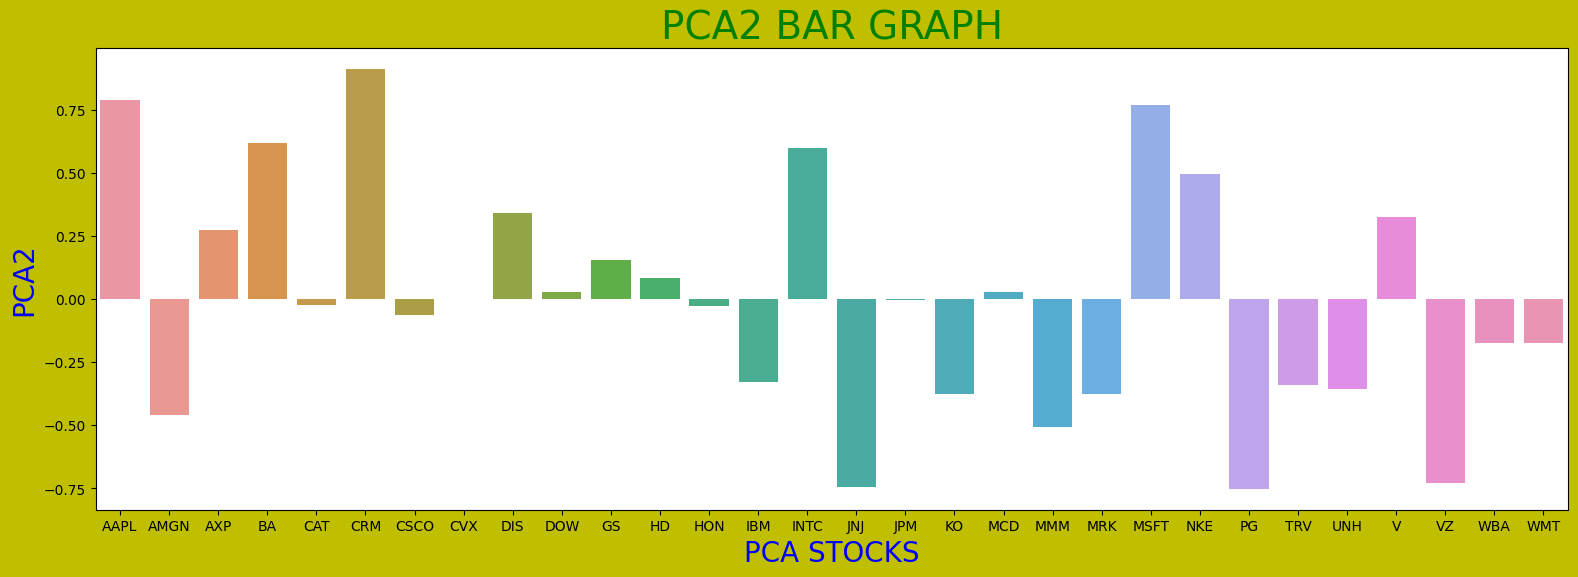

In [242]:
# PLOTTING PCA2
plt.rcParams['figure.figsize'] = (19, 6)
sns.barplot(x = adjCloseTwoCompPCAdf['Stocks'], y = adjCloseTwoCompPCAdf['PC2'])

plt.ylabel('PCA2', size = 20, color = 'BLUE')
plt.xlabel('PCA STOCKS', size = 20, color = 'BLUE')
plt.title('PCA2 BAR GRAPH', size = 28, color = 'GREEN')
plt.show()

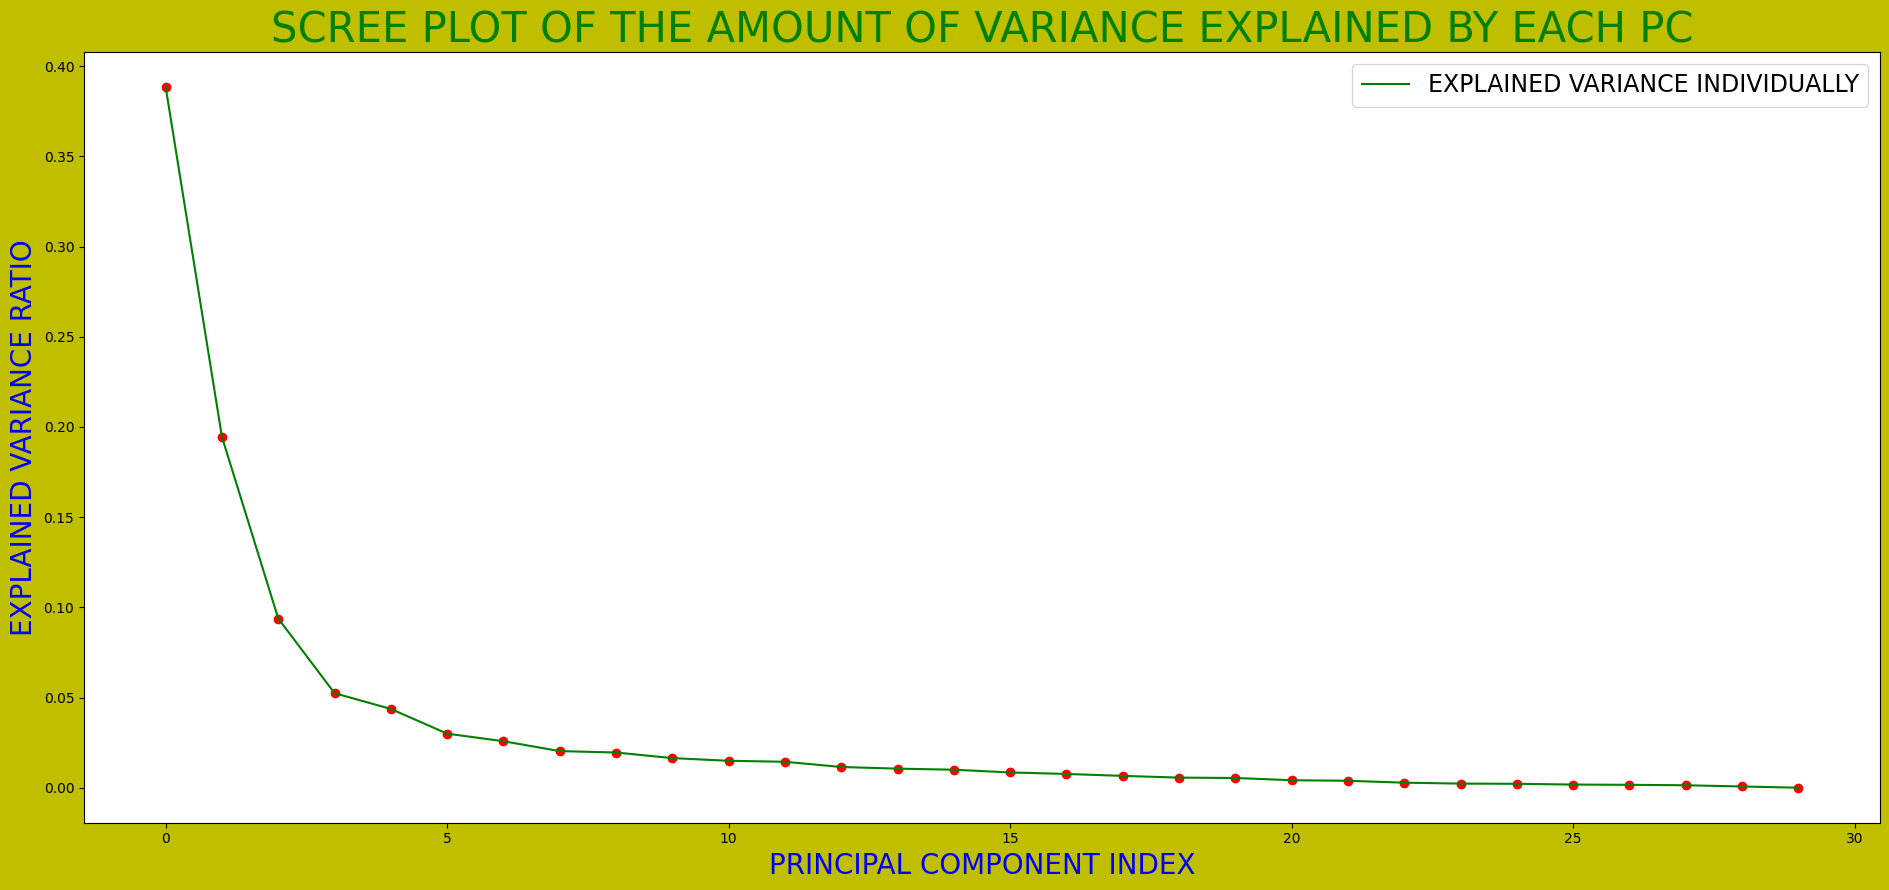

In [243]:
# 1.4 Calculate the amount of variance explained by each principal component and make a ‘Scree’ plot. 
# How many principal components are required to explain 95% of the variance?
maxCompPCA = PCA(n_components = 30)                                      # MAXIMUM PC TO EXIT = 30
adjCloseMaxCompPCA = maxCompPCA.fit_transform(adjCloseCorr)  

# PLOT DETAILS
plt.rcParams['figure.figsize'] = (19, 9)
plt.rcParams['figure.facecolor'] = 'y'
plt.rcParams['figure.edgecolor'] = 'r'

# EXPLAINED VARIANCE USING explained_variance_ration_ ATTRIBUTE
#  attribute of a fitted PCA object in scikit-learn to determine the amount of variance explained by each principal component.
explainedVarPCA = maxCompPCA.explained_variance_ratio_              

# EIGEN VALUES CUMULATIVE SUM
eigenCumSum = np.cumsum(explainedVarPCA)

# RANGES
varPCRange = range(0, len(explainedVarPCA))
eigenCumSumRange = range(0, len(eigenCumSum))

# SCREE PLOT OF THE AMOUNT OF VARIANCE EXPLAINED BY EACH PC 
# plt.step(eigenCumSumRange, eigenCumSum, where = 'mid', label = 'CUMULATIVE SUM FOR EXPLAINED VARIANCE', color = 'red')
plt.plot(varPCRange, explainedVarPCA, label = 'EXPLAINED VARIANCE INDIVIDUALLY', color = 'green')
plt.scatter(varPCRange, explainedVarPCA, color = 'RED')

plt.ylabel('EXPLAINED VARIANCE RATIO', size = 20, color = 'BLUE')
plt.xlabel('PRINCIPAL COMPONENT INDEX', size = 20, color = 'BLUE')
plt.legend(loc = 'best', fontsize = 17)
plt.title('SCREE PLOT OF THE AMOUNT OF VARIANCE EXPLAINED BY EACH PC', size = 30, color = 'green')
plt.tight_layout()
plt.show()

In [244]:
# COUNTING THE NUMBER OF PRINCIPAL COMPONENTS REQUIRED TO EXPLAIN 95% OF THE VARIANCE  
print(f"The principal components required to explain 95% of the variance: {np.argmax(eigenCumSum >= 0.95) + 1}")

The principal components required to explain 95% of the variance: 16


In [245]:
# 1.5 Investigate the scatter plot of the first two principal components and calculate the average of all 30 stocks. 
# Based on Euclidean distances away from this average, identify the three most distant stocks. 
# Can you explain why these stocks are unusual?

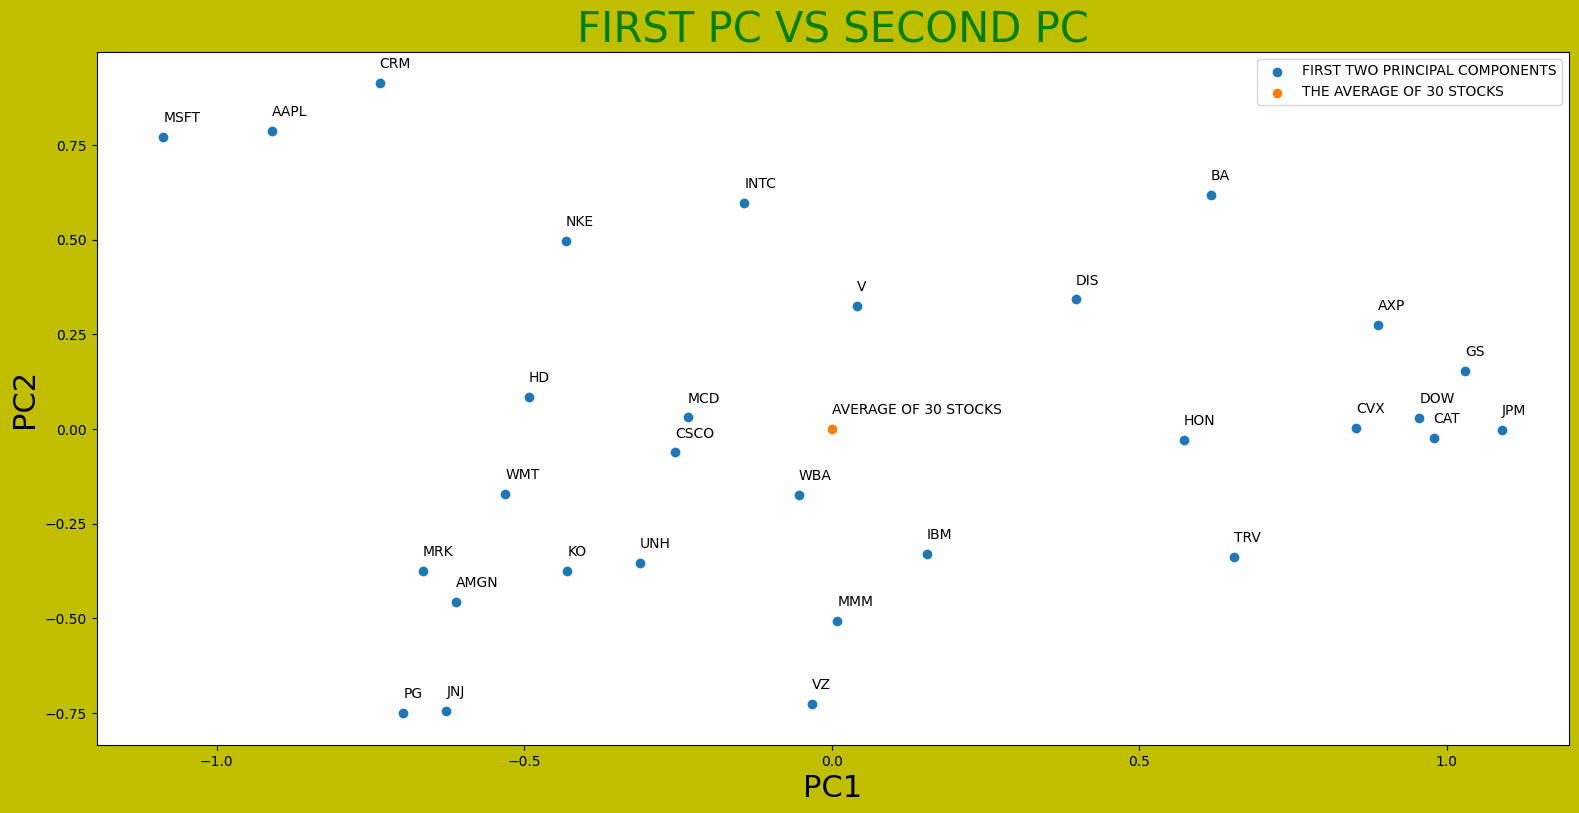

In [246]:
# PLOT DETAILS - scatter plot of the first two principal components
plt.rcParams['figure.figsize'] = (19, 9)
plt.rcParams['figure.facecolor'] = 'y'
plt.rcParams['figure.edgecolor'] = 'r'

plt.scatter(adjCloseTwoCompPCAdf['PC1'], adjCloseTwoCompPCAdf['PC2'], label = 'FIRST TWO PRINCIPAL COMPONENTS')
plt.scatter(adjCloseTwoCompPCAdf['PC1'].mean(), adjCloseTwoCompPCAdf['PC2'].mean(), label = 'THE AVERAGE OF 30 STOCKS')
plt.annotate("AVERAGE OF 30 STOCKS", (adjCloseTwoCompPCAdf['PC1'].mean(), adjCloseTwoCompPCAdf['PC2'].mean() + 0.04))

plt.xlabel('PC1', size = 22, color = 'BLACK')
plt.ylabel('PC2', size = 22, color = 'BLACK')

plt.title('FIRST PC VS SECOND PC', size = 30, color = 'GREEN')

for index, stk in enumerate(adjCloseTwoCompPCAdf['Stocks']):
    plt.annotate(stk, (adjCloseTwoCompPCAdf['PC1'][index], adjCloseTwoCompPCAdf['PC2'][index] + 0.04))

plt.legend()
plt.show()

In [247]:
# calculate the mean of all 30 stocks for each principal component. 
# FIRST PCA MEAN
firstPCAmean = adjCloseTwoCompPCAdf['PC1'].mean()

# SECOND PCA MEAN
secondPCAmean = adjCloseTwoCompPCAdf['PC2'].mean()

print(f"\nTHE MEAN OF THE FIRST PCA IS {firstPCAmean}")
print(f"THE MEAN OF THE SECOND PCA IS {secondPCAmean}")
adjCloseTwoCompPCAdf['PC1']


THE MEAN OF THE FIRST PCA IS -6.661338147750939e-17
THE MEAN OF THE SECOND PCA IS -9.25185853854297e-18


0    -0.909285
1    -0.611014
2     0.888351
3     0.616193
4     0.978792
5    -0.734833
6    -0.254457
7     0.853008
8     0.397618
9     0.955425
10    1.030100
11   -0.492057
12    0.572817
13    0.154789
14   -0.142135
15   -0.626228
16    1.090303
17   -0.429847
18   -0.233682
19    0.009516
20   -0.664762
21   -1.086381
22   -0.432052
23   -0.696447
24    0.653744
25   -0.312295
26    0.040564
27   -0.031977
28   -0.053116
29   -0.530653
Name: PC1, dtype: float64

In [248]:
# calculate Euclidean distances from the mean then identify the three most distant stocks for each principal component.
eucDistances1 = []

for i in range(len(adjCloseTwoCompPCAdf)):
    eucDistances1.append(math.dist((adjCloseTwoCompPCAdf['PC1'][i], adjCloseTwoCompPCAdf['PC2'][i]), (firstPCAmean, secondPCAmean)))

dfEucDistance = pd.DataFrame(data = eucDistances1, columns = ['EUCLIDIAN DISTANCES'])

dfEucDistance['Stocks'] = dailyReturns.columns
dfEucDistance = dfEucDistance.sort_values(['EUCLIDIAN DISTANCES'], ascending = False, ignore_index = True)  # SORTING
dfEucDistance.head(3)

,EUCLIDIAN DISTANCES,Stocks
0,1.331587,MSFT
1,1.202783,AAPL
2,1.171955,CRM


### Question 2: DENDROGRAM

In [249]:
# 2.1. Describe the components of a dendrogram, how it is constructed and how it is interpreted.

In [250]:
# 2.2. Given a collection of pairwise dissimilarity values, describe the steps involved in constructing a dendrogram.

In [251]:
# 2.3. Use the correlation matrix from question (1.3) above to provide pairwise distances between the 30 stocks.
# Give the formula for this rescaled distance and provide an interpretation of small and large distances.
distPairWise = np.sqrt(2 * (1 - adjCloseCorr))
distPairWise

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
AAPL,0.000000,1.222792,1.337381,1.246129,1.375142,1.104945,1.118929,1.349613,1.320934,1.314200,...,1.408080,0.801145,1.218402,1.334400,1.305433,1.273942,1.180068,1.492056,1.335558,1.213610
AMGN,1.222792,0.000000,1.323713,1.338879,1.236517,1.371447,1.125655,1.281474,1.300501,1.250796,...,1.161522,1.215939,1.307761,1.116449,1.203082,1.143755,1.290210,1.167817,1.211378,1.228306
AXP,1.337381,1.323713,0.000000,0.973135,0.914410,1.250942,1.208092,0.903530,0.977447,0.950479,...,1.390260,1.326580,1.243266,1.332146,0.924169,1.185221,0.995428,1.252678,1.269174,1.340237
BA,1.246129,1.338879,0.973135,0.000000,1.012730,1.233577,1.268381,1.005619,1.058287,1.028378,...,1.434264,1.279368,1.273103,1.422845,1.123471,1.358196,1.167506,1.350224,1.186011,1.276539
CAT,1.375142,1.236517,0.914410,1.012730,0.000000,1.359574,1.211686,0.904348,1.062727,0.803603,...,1.270238,1.412036,1.318598,1.324155,0.980419,1.202507,1.197577,1.210848,1.164444,1.240370
CRM,1.104945,1.371447,1.250942,1.233577,1.359574,0.000000,1.205198,1.333747,1.262226,1.330130,...,1.417005,0.977903,1.240103,1.373546,1.387439,1.373292,1.160255,1.416272,1.383266,1.279421
CSCO,1.118929,1.125655,1.208092,1.268381,1.211686,1.205198,0.000000,1.187663,1.168230,1.156224,...,1.299439,1.064830,1.210381,1.106926,1.110542,1.160462,1.133922,1.203772,1.195239,1.213154
CVX,1.349613,1.281474,0.903530,1.005619,0.904348,1.333747,1.187663,0.000000,1.141577,0.809455,...,1.289948,1.355735,1.286193,1.316522,1.011472,1.234677,1.175047,1.172965,1.212145,1.285494
DIS,1.320934,1.300501,0.977447,1.058287,1.062727,1.262226,1.168230,1.141577,0.000000,1.102314,...,1.377028,1.280181,1.232711,1.297075,1.100543,1.256656,1.000855,1.241508,1.279384,1.323546
DOW,1.314200,1.250796,0.950479,1.028378,0.803603,1.330130,1.156224,0.809455,1.102314,0.000000,...,1.342643,1.389949,1.257773,1.329545,0.996282,1.258840,1.188103,1.178357,1.142705,1.222822


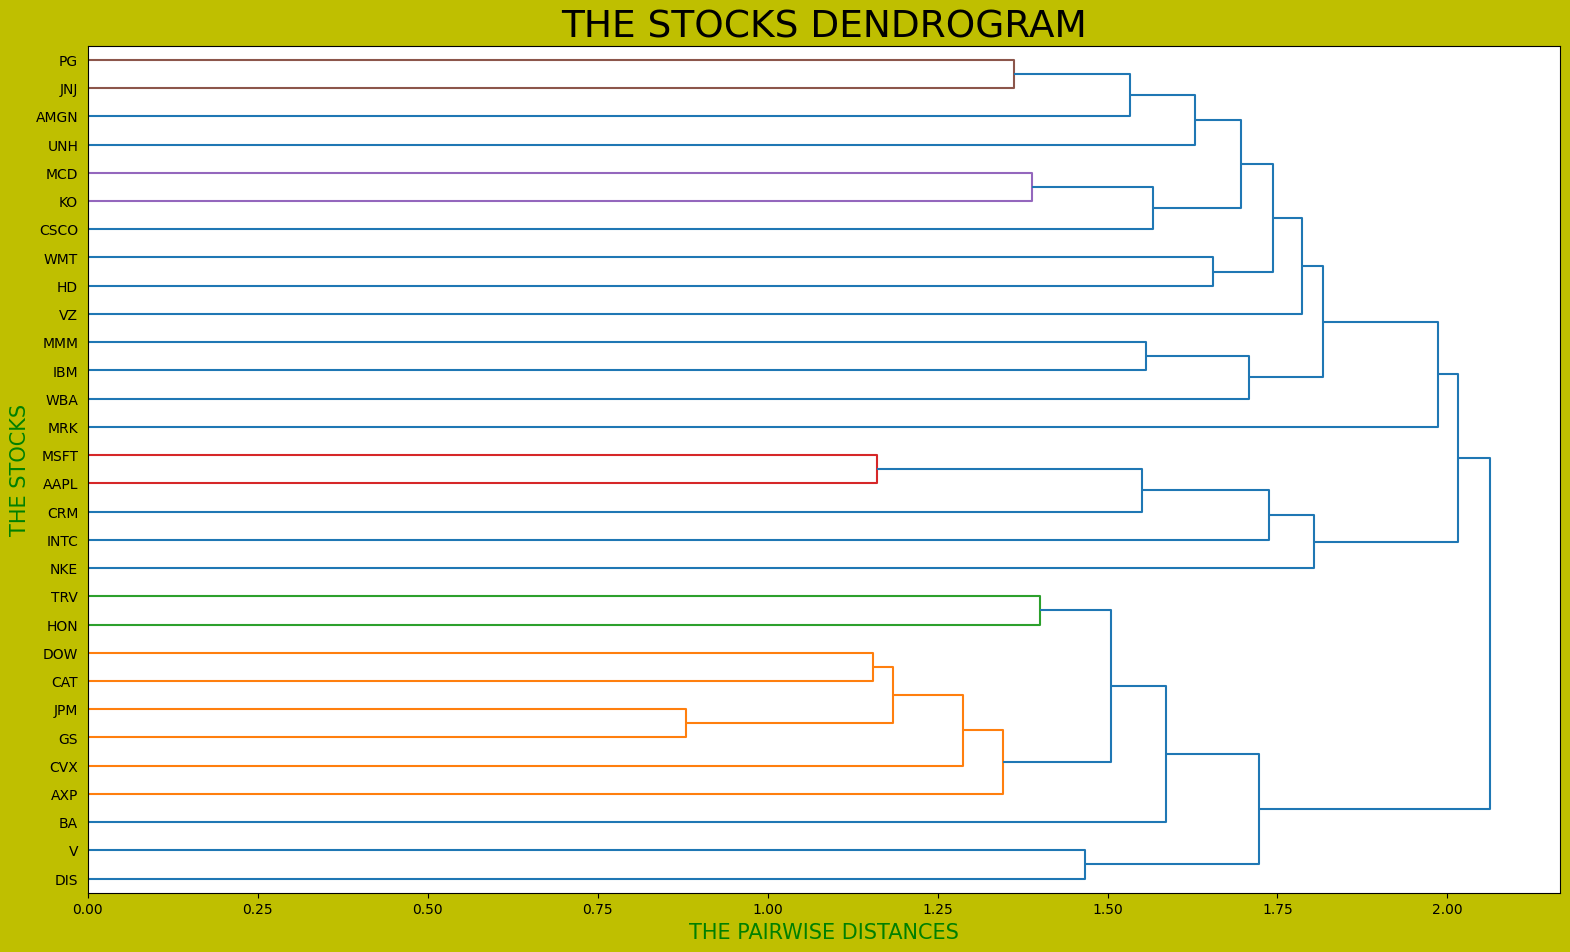

In [252]:
# 2.4. Construct a horizontal dendrogram using the average linkage approach, 
# carefully labelling the graphic with the names of the 30 stocks.
# PLOT DETAILS
plt.rcParams['figure.figsize'] = (19, 11)
plt.rcParams['figure.facecolor'] = 'y'
plt.rcParams['figure.edgecolor'] = 'r'

hier = hierarchy.linkage(distPairWise, 'average')
hierarchy.dendrogram(hier, orientation = 'right', labels = distPairWise.columns)
plt.xlabel("THE PAIRWISE DISTANCES", size = 15, color = 'GREEN')
plt.ylabel("THE STOCKS",  size = 15, color = 'GREEN')
plt.title("THE STOCKS DENDROGRAM", size = 27)
plt.show()

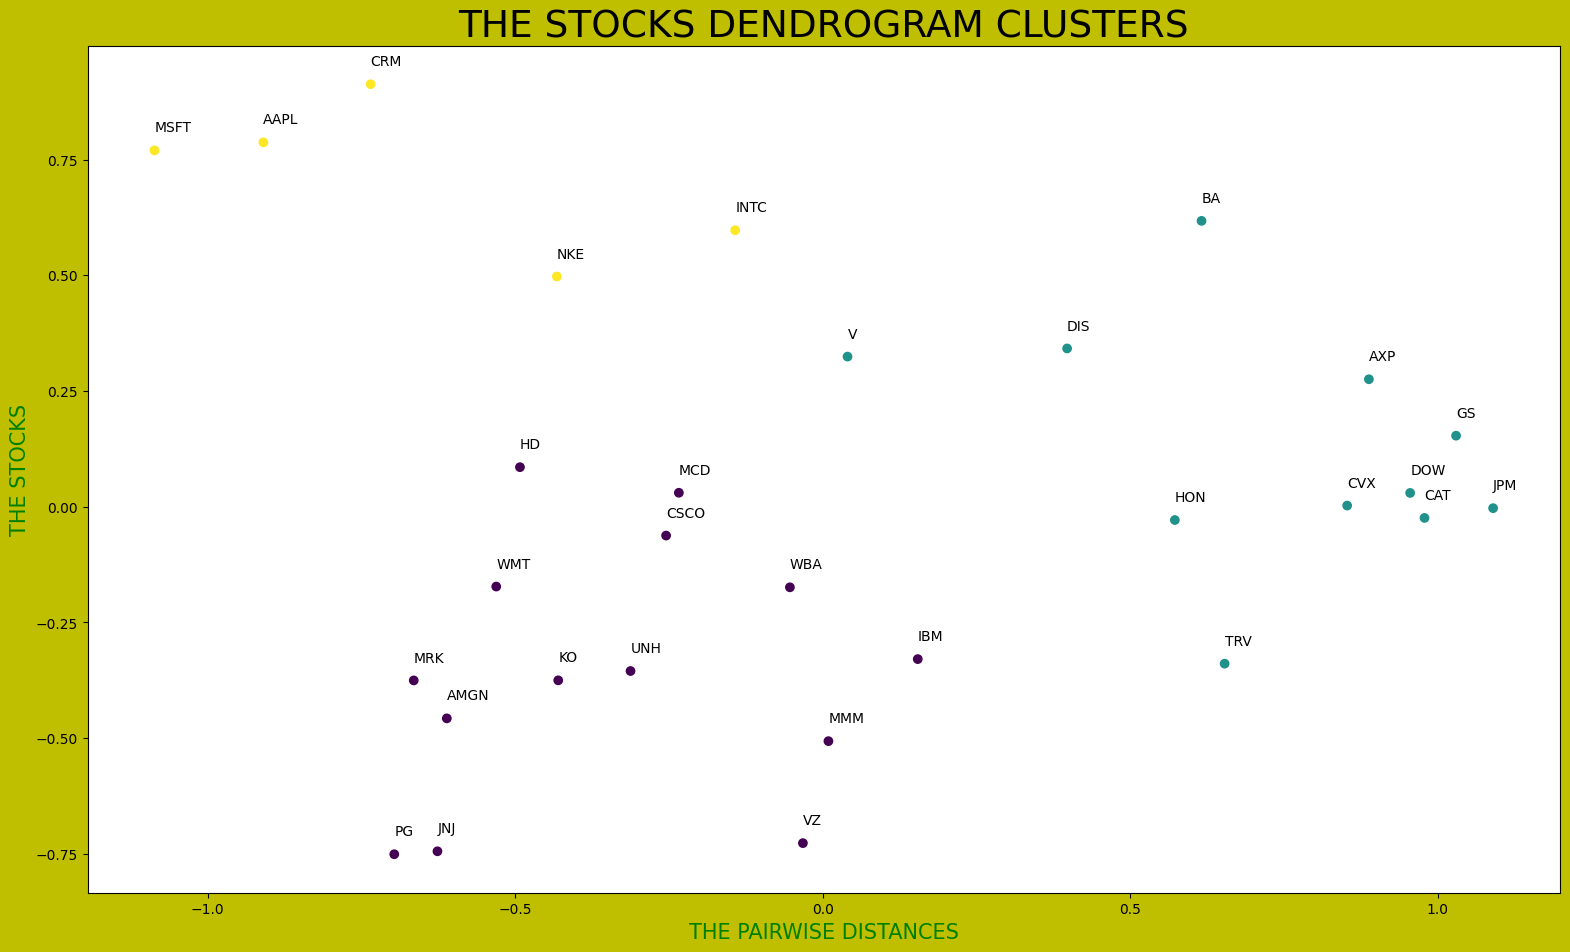

In [253]:
# 2.5. Use the dendrogram to provide a few clusters of stocks and list the stocks that are members of each cluster. 
# Can you provide a description of each cluster and relate it to industrial sectors such as Financials, Energy etc?

# PLOT DETAILS
plt.rcParams['figure.figsize'] = (19, 11)
plt.rcParams['figure.facecolor'] = 'y'
plt.rcParams['figure.edgecolor'] = 'r'

clusters = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='average')
predictClu = clusters.fit_predict(adjCloseCorr)

plt.scatter(adjCloseTwoCompPCAdf['PC1'], adjCloseTwoCompPCAdf['PC2'], c = clusters.labels_)
for index, cmp in enumerate(adjCloseTwoCompPCAdf['Stocks']):
    plt.annotate(cmp, (adjCloseTwoCompPCAdf['PC1'][index], adjCloseTwoCompPCAdf['PC2'][index] + 0.04))

plt.xlabel("THE PAIRWISE DISTANCES", size = 15, color = 'GREEN')
plt.ylabel("THE STOCKS",  size = 15, color = 'GREEN')
plt.title("THE STOCKS DENDROGRAM CLUSTERS", size = 27)
plt.show()

In [254]:
dfClusters = pd.DataFrame(data = predictClu, columns = ["CLUSTERS"])
dfClusters["INDEXES"] = dailyReturns.columns
stockNames = ["Apple", "Amgen", "American Express", "Boeing", "Caterpillar", "Salesforce", "Cisco", "Chevron", "Disney", "Dow", "Goldman Sachs", "Home Depot", "Honeywell", "IBM", "Intel", "Johnson & Johnson", "JPMorgran Chase", "Coca-Cola", "McDonald's", "3M", "Merck", "Microsoft", "Nike", "Procter and Gamble", "Travelers", "UnitedHealth", "Visa", "Verizon", "Walgreens Boots Alliance", "Walmart"]
dfClusters["NAMES"] = stockNames

cluster0 = pd.DataFrame(columns = ['INDEX', 'NAME', 'CLUSTER'])
cluster1 = pd.DataFrame(columns = ['INDEX', 'NAME', 'CLUSTER'])
cluster2 = pd.DataFrame(columns = ['INDEX', 'NAME', 'CLUSTER'])

# LISTING THE CLUSTERS
for index, cluster in enumerate(dfClusters['CLUSTERS']):
    if cluster == 0:
        cluster0 = cluster0.append({'INDEX': dfClusters['INDEXES'][index], 'NAME': dfClusters['NAMES'][index], 'CLUSTER': cluster}, ignore_index = True)
        
    elif cluster == 1:
        cluster1 = cluster1.append({'INDEX': dfClusters['INDEXES'][index], 'NAME': dfClusters['NAMES'][index], 'CLUSTER': cluster}, ignore_index = True)
        
    elif cluster == 2:
        print(dfClusters['NAMES'][index])
        cluster2 = cluster2.append({'INDEX': dfClusters['INDEXES'][index], 'NAME': dfClusters['NAMES'][index], 'CLUSTER': cluster}, ignore_index = True)

# PRINTING TABLE OF CLUSTERS
cluster0

Apple
Salesforce
Intel
Microsoft
Nike


,INDEX,NAME,CLUSTER
0,AMGN,Amgen,0
1,CSCO,Cisco,0
2,HD,Home Depot,0
3,IBM,IBM,0
4,JNJ,Johnson & Johnson,0
5,KO,Coca-Cola,0
6,MCD,McDonald's,0
7,MMM,3M,0
8,MRK,Merck,0
9,PG,Procter and Gamble,0


In [255]:
cluster1

,INDEX,NAME,CLUSTER
0,AXP,American Express,1
1,BA,Boeing,1
2,CAT,Caterpillar,1
3,CVX,Chevron,1
4,DIS,Disney,1
5,DOW,Dow,1
6,GS,Goldman Sachs,1
7,HON,Honeywell,1
8,JPM,JPMorgran Chase,1
9,TRV,Travelers,1


In [256]:
cluster2

,INDEX,NAME,CLUSTER
0,AAPL,Apple,2
1,CRM,Salesforce,2
2,INTC,Intel,2
3,MSFT,Microsoft,2
4,NKE,Nike,2


### Question 3: ENSEMBLE FOR CLASSIFICATION

In [257]:
# 3.1 Name three sources of uncertainty and explain how they impact on the modelling process when using machine learning approaches.


In [258]:
# 3.2 What is the concept behind model averaging and give some examples of how this technique can be implemented in practice when generating predictions?


In [259]:
# 3.3 What kind of ensemble methods can be used to reduce the effects of uncertainty and improve on individual models? 
# How do they achieve this goal?

In [260]:
# 3.4 Construct a random forest (RF) model and apply this to the Titanic dataset. 
# Explain how you selected the optimal number of trees and support your choice using a graph.
# LOADING THE TITANIC DATA & EXTRACTING (age, sex, pclass, survived)
titanic = pd.read_csv('titanic3.csv')
titanic = titanic[['age','sex','pclass','survived']]

# Imputing missing values using mean
meanAge = titanic['age'].mean()                  # CALCULATING THE MEAN AGE
titanicNoNaN = titanic.fillna(meanAge)           # FILLING NAN VALUES - BCZ ONLY AGE COLUMN HAS NANS - USE THE WHOLE DATASET

# TRANSFORMING sex CATEGORIES INTO NUMERICAL VALUES
# Fit label encoder and return encoded labels: MAKING females:0 and males:1
titanicNoNaN['sex'] = LabelEncoder().fit_transform(titanicNoNaN['sex'])

x = titanicNoNaN[['age','sex','pclass']]
y = titanicNoNaN['survived']

# DATASET SPLIT
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [261]:
randomForestAccList = []

listOfTrees = range(1, 150, 5)

for tree in listOfTrees:
    model = RandomForestClassifier(n_estimators = tree, random_state = 20).fit(xTrain, yTrain)
    scoresRF = model.score(xTest, yTest)
    randomForestAccList.append(scoresRF)
                               
dfTrees = pd.DataFrame(data = randomForestAccList, columns = ['Accuracies'])
dfTrees['Trees number'] = listOfTrees
dfTrees

,Accuracies,Trees number
0,0.767176,1
1,0.786260,6
2,0.790076,11
3,0.786260,16
4,0.782443,21
5,0.782443,26
6,0.782443,31
7,0.767176,36
8,0.767176,41
9,0.767176,46


In [262]:
# OPTIMAL NUMBER
optNbrTrees = dfTrees.sort_values(['Accuracies'], ascending = False).head(1)
optNbrTrees = optNbrTrees.rename(columns = {"Tress number": "Optimal trees number"})
optNbrTreesAccuracy = optNbrTrees['Accuracies'].values[0]
optNbrTreesNumber = optNbrTrees['Trees number'].values[0]
print("The optimal number of trees is", optNbrTreesNumber, "with accuracy of", optNbrTreesAccuracy)

The optimal number of trees is 11 with accuracy of 0.7900763358778626


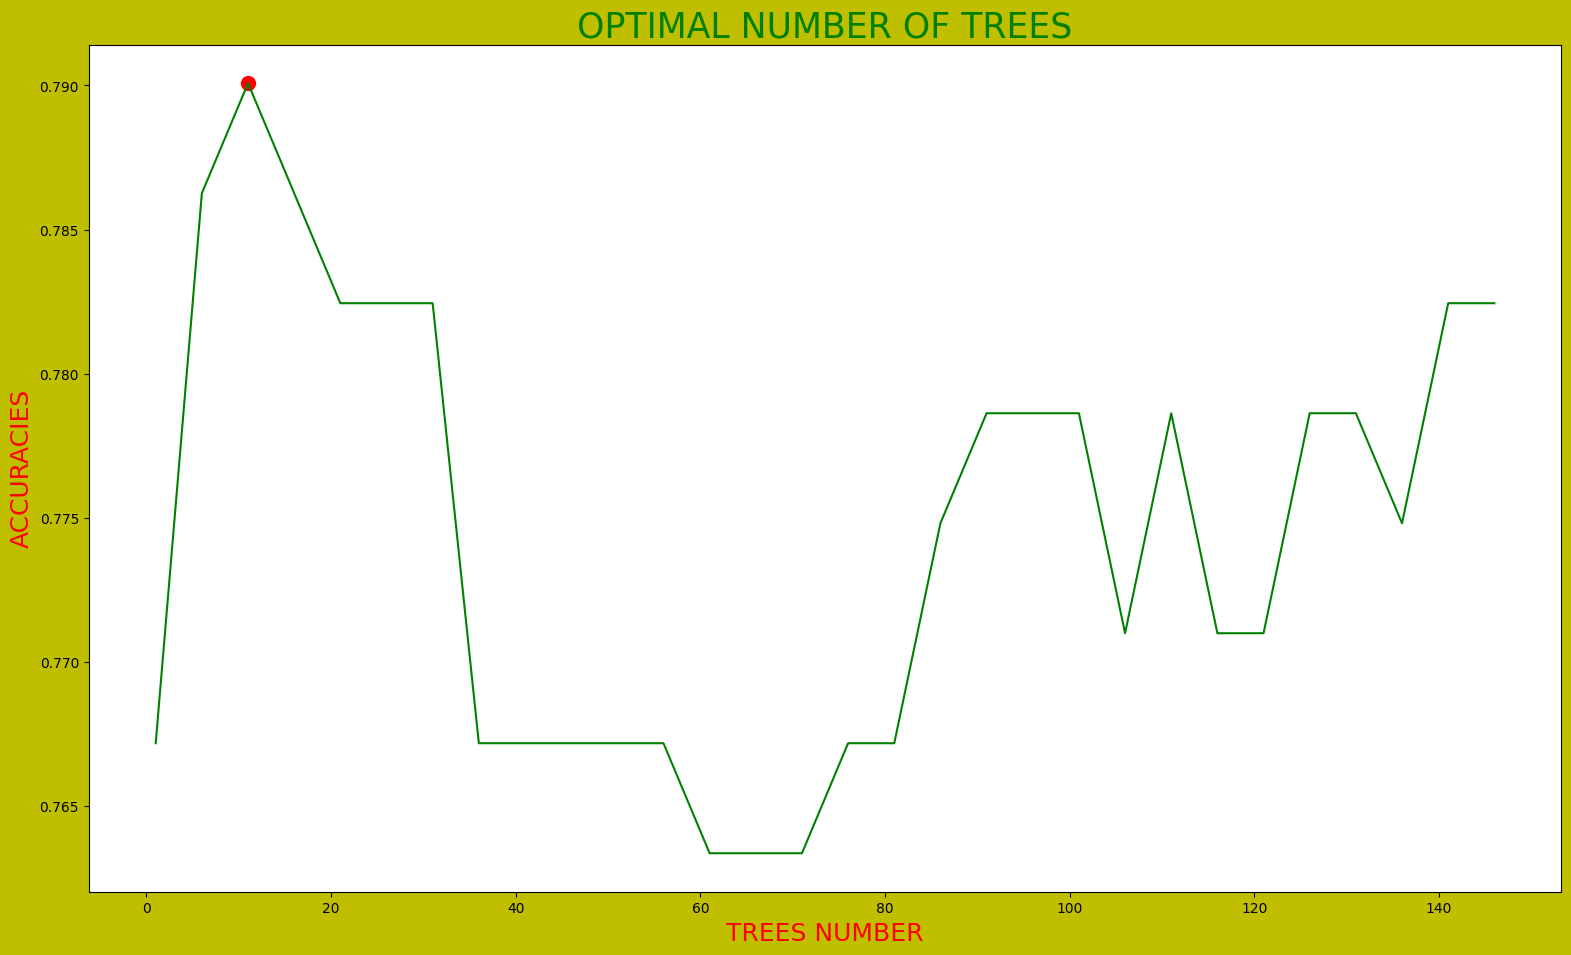

In [263]:
# PLOT DETAILS
plt.rcParams['figure.figsize'] = (19, 11)
plt.rcParams['figure.facecolor'] = 'y'
plt.rcParams['figure.edgecolor'] = 'r'

plt.plot(listOfTrees, randomForestAccList, color = "GREEN")
plt.xlabel("TREES NUMBER", size = 18, color = "RED")
plt.ylabel("ACCURACIES", size = 18, color = "RED")

plt.scatter(optNbrTreesNumber, optNbrTreesAccuracy, color = "RED", s = 100)

plt.title("OPTIMAL NUMBER OF TREES", size = 25, color = "green")
plt.show()

In [264]:
# 3.5 Undertake a ROC analysis and show how the RF performs relative to the previous models (logistic regression, classification tree and KNN). 
# Provide evidence to show as clearly as possible which model is best for classifying survival on the Titanic.
# DECISION TREE MODEL
dtClassf = DecisionTreeClassifier(random_state = 0, max_depth = None).fit(xTrain, yTrain)

# RANDOM FOREST MODEL
RFclassf = RandomForestClassifier(n_estimators = 20, random_state = 0).fit(xTrain, yTrain)

# KNN MODEL
knnClassf = KNeighborsClassifier(n_neighbors = 5).fit(xTrain, yTrain)

# LOGISTIC MODEL
logRegress = LogisticRegression().fit(xTrain, yTrain)

# PROBABILITIES OF ALL MODELS
dtClassfProbs = dtClassf.predict_proba(xTest)
rfClassfProbs = RFclassf.predict_proba(xTest)
knnClassfProbs = knnClassf.predict_proba(xTest)
logRegressProbs = logRegress.predict_proba(xTest)

# STORE POSITIVE PROBABILITIES
dtClassfProbs = dtClassfProbs[:, 1]
rfClassfProbs = rfClassfProbs[:, 1]
knnClassfProbs = knnClassfProbs[:, 1]
logRegressProbs = logRegressProbs[:, 1]

# SCORES - ACCURACIES
aucDT = roc_auc_score(yTest, dtClassfProbs)
aucRF = roc_auc_score(yTest, rfClassfProbs)
aucKNN = roc_auc_score(yTest, knnClassfProbs)
aucLogRegress = roc_auc_score(yTest, logRegressProbs)

# DISPLAY SCORES
print('ROC AUC FOR DECISION TREE CLASSIFIER = %.4f' % (aucDT))
print('ROC AUC FOR RANDOM FOREST = %.4f' % (aucRF))
print('ROC AUC FOR KNN CLASSIFIER = %.4f' % (aucKNN))
print('ROC AUC FOR LOGISTIC REGRESSION = %.4f' %(aucLogRegress))

# ROC CURVES: FALSE POSITIVE RATE(FPR) AND TRUE POSITIVE RATE(TPR)
fprDT, tprDT, _ = roc_curve(yTest, dtClassfProbs)
fprRF, tprRF, _ = roc_curve(yTest, rfClassfProbs)
fprKNNClassf, tprKNNClassf, _ = roc_curve(yTest, knnClassfProbs )
fprLogRegress, tprLogRegress, _ = roc_curve(yTest, logRegressProbs)

ROC AUC FOR DECISION TREE CLASSIFIER = 0.7654
ROC AUC FOR RANDOM FOREST = 0.8003
ROC AUC FOR KNN CLASSIFIER = 0.7559
ROC AUC FOR LOGISTIC REGRESSION = 0.8417


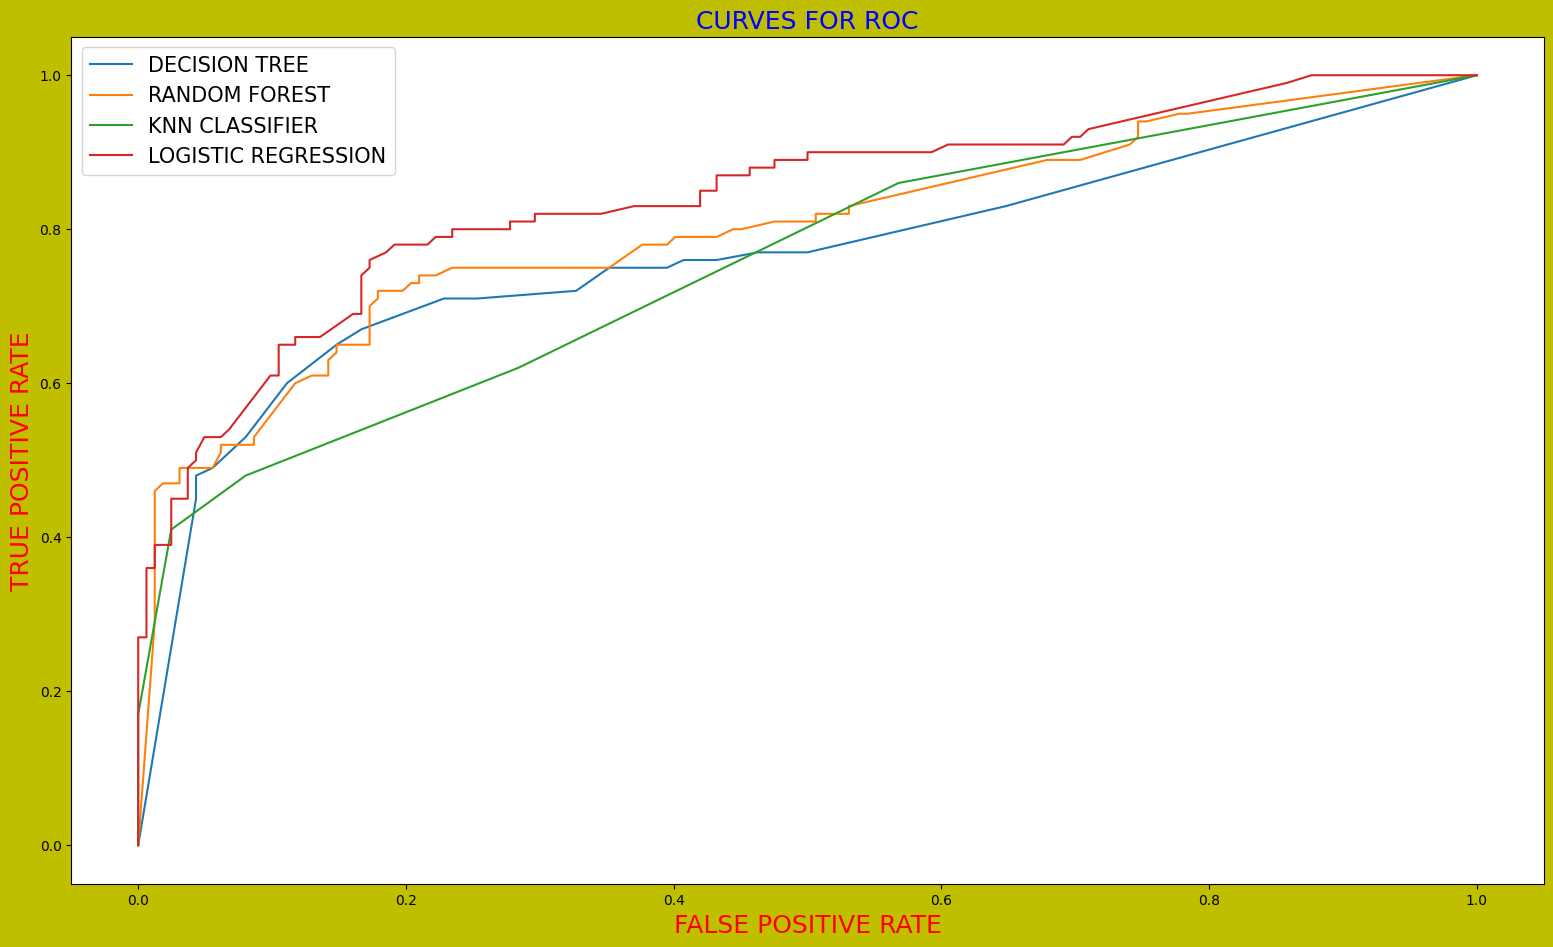

In [265]:
# PLOT DETAILS
plt.rcParams['figure.figsize'] = (19, 11)
plt.rcParams['figure.facecolor'] = 'y'
plt.rcParams['figure.edgecolor'] = 'r'

plt.plot(fprDT, tprDT, label = 'DECISION TREE')
plt.plot(fprRF, tprRF, label = 'RANDOM FOREST')
plt.plot(fprKNNClassf, tprKNNClassf, label = 'KNN CLASSIFIER')
plt.plot(fprLogRegress, tprLogRegress, label = 'LOGISTIC REGRESSION')

plt.xlabel('FALSE POSITIVE RATE', color = 'RED', size = 18)
plt.ylabel('TRUE POSITIVE RATE', color='RED', size = 18)
plt.title('CURVES FOR ROC', color='BLUE', size = 18)
plt.legend(loc = 'best', fontsize = 15)
plt.show()

In [266]:
# INFERENCE
# The Log Regress model is the best model bcz it has the highest ROC AUC and has the highest value of TPR

### Question 4: ENSEMBLES FOR REGRESSION

In [267]:
# 4.1 Describe the concept of a random forest (RF) regression model.


In [268]:
# 4.2 Construct a random forest (RF) model for the red wine dataset and show how the optimal number of leafs was estimated.
redWine = pd.read_csv('winequality-red.csv', sep = ";")

# EXTRACTING THE DATA TO USE
xRedWine = redWine.drop(columns = ['quality'])
yRedWine = redWine.filter(['quality'])

# RED WINE DATA SPLITING
xRedTrain, xRedTest, yRedTrain, yRedTest = train_test_split(xRedWine, yRedWine, test_size = 0.2, random_state = 0)

# LIST FOR ACCURACY SCORES
rfErrorsRedWine = []

# DIFFERENT LEAVES NUMBERS
leavesRedWine = range(2, 150, 5)

# CALCULATING THE ACCURACY SCORES FOR THE TREES
for leavesNbr in leavesRedWine:
    classfRedWine = RandomForestRegressor(max_leaf_nodes = leavesNbr, random_state = 20).fit(xRedTrain, yRedTrain)
    rfPredict = classfRedWine.predict(xRedTest)
    rfMSE = mean_squared_error(yRedTest, rfPredict)
    rfErrorsRedWine.append(rfMSE)

# LEAVES ACCURACY VISUALIZATION
dfLeavesRedWine = pd.DataFrame(data = rfErrorsRedWine, columns = ['RED WINE ERRORS'])
dfLeavesRedWine['LEAVES NUMBER'] = leavesRedWine
dfLeavesRedWine

,RED WINE ERRORS,LEAVES NUMBER
0,0.464924,2
1,0.394619,7
2,0.382246,12
3,0.372424,17
4,0.362081,22
5,0.356946,27
6,0.351728,32
7,0.348804,37
8,0.346598,42
9,0.342819,47


In [269]:
# FOREST'S OPTIMAL NUMBER OF LEAVES
leavesOptNbrRedWine = dfLeavesRedWine.sort_values(['RED WINE ERRORS'], ascending = True).head(1)
print('OPTIMAL NUMBER OF LEAVES FOR RED WINE IS', leavesOptNbrRedWine['LEAVES NUMBER'].values[0], 'WITH AN ERRORS', leavesOptNbrRedWine['RED WINE ERRORS'].values[0])

OPTIMAL NUMBER OF LEAVES FOR RED WINE IS 147 WITH AN ERRORS 0.3250103468617811


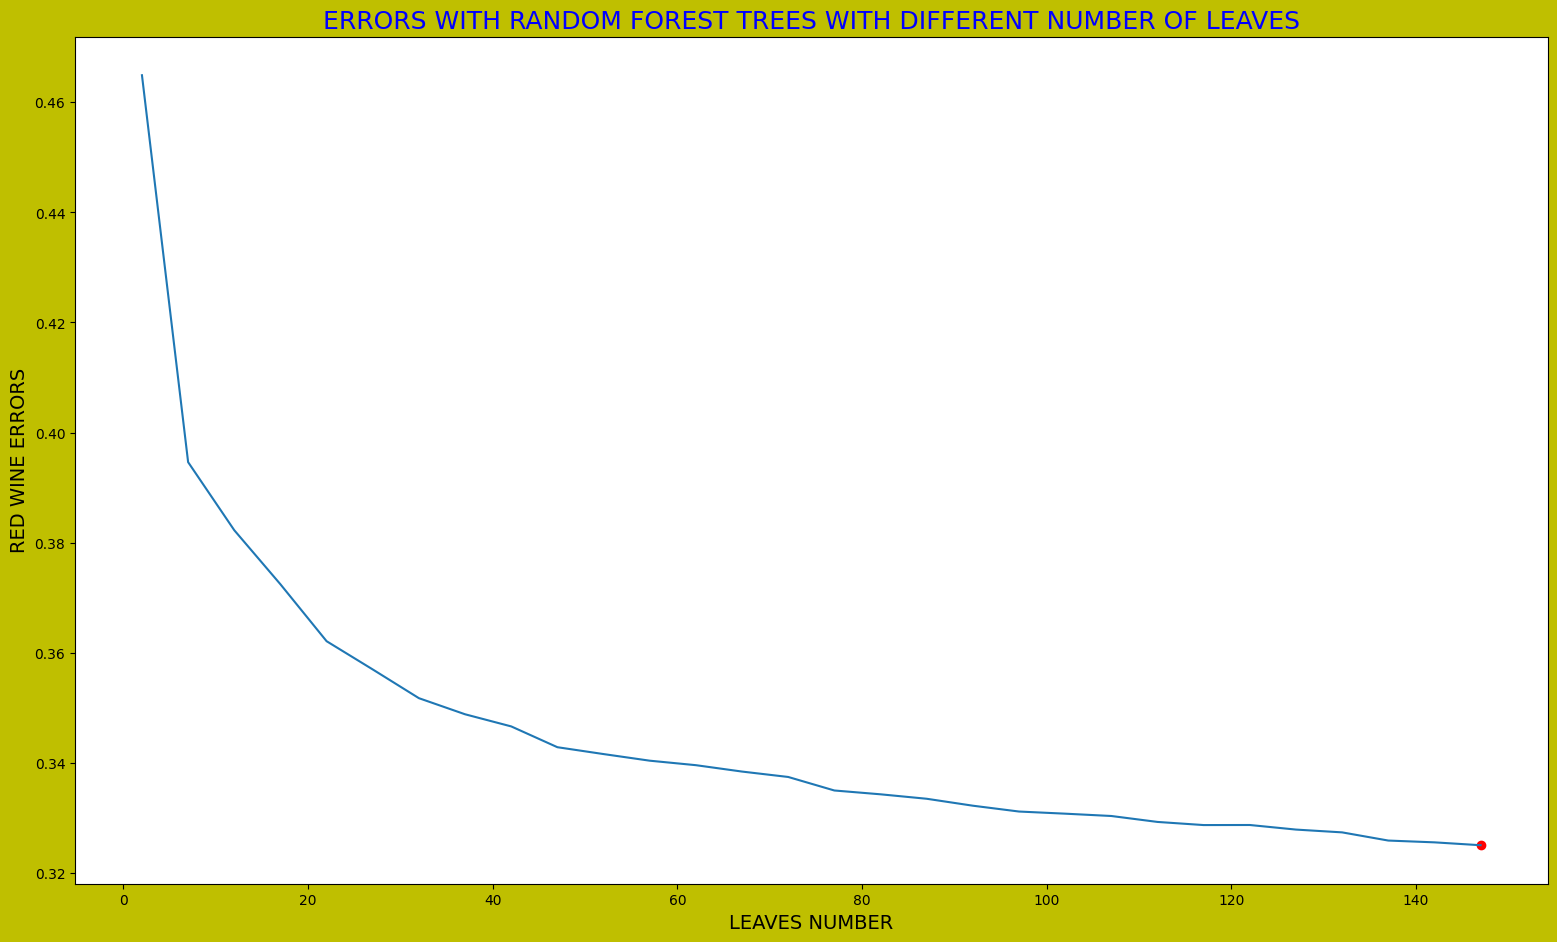

In [270]:
plt.rcParams['figure.figsize'] = (19, 11)
plt.rcParams['figure.facecolor'] = 'y'
plt.rcParams['figure.edgecolor'] = 'r'

plt.plot(dfLeavesRedWine['LEAVES NUMBER'], dfLeavesRedWine['RED WINE ERRORS'])
plt.scatter(leavesOptNbrRedWine['LEAVES NUMBER'], leavesOptNbrRedWine['RED WINE ERRORS'], color = 'RED')

plt.title("ERRORS WITH RANDOM FOREST TREES WITH DIFFERENT NUMBER OF LEAVES", color='BLUE', size = 18,)
plt.xlabel('LEAVES NUMBER', size = 14)
plt.ylabel('RED WINE ERRORS', size = 14)
plt.show()

In [271]:
# 4.3 Explain and show how the optimal number of trees was computed.
rfErrorsRedWine = []
treesNbrRedWine = range(1, 20)

# THE ACCURACY SCORES FOR THE TREES
for treesNbr in treesNbrRedWine:
    classfRedWine = RandomForestRegressor(n_estimators = treesNbr, random_state = 20).fit(xRedTrain, yRedTrain)
    rfPredict = classfRedWine.predict(xRedTest)
    rfMSE = mean_squared_error(yRedTest, rfPredict)
    rfErrorsRedWine.append(rfMSE)
    
# LEAVES ACCURACY VISUALIZATION
dfRedWineTrees = pd.DataFrame(data = rfErrorsRedWine, columns = ['RED WINE ERRORS'])
dfRedWineTrees['TREES NUMBER RED WINE'] = treesNbrRedWine
dfRedWineTrees

,RED WINE ERRORS,TREES NUMBER RED WINE
0,0.693750,1
1,0.497656,2
2,0.450000,3
3,0.421289,4
4,0.394250,5
5,0.376649,6
6,0.368048,7
7,0.369922,8
8,0.371373,9
9,0.367531,10


In [272]:
# FOREST'S OPTIMAL NUMBER OF TREES IN THE RED WINE FOREST
OptNbrTreesRedWine = dfRedWineTrees.sort_values(['RED WINE ERRORS'], ascending = True).head(1)
print('OPTIMAL NUMBER OF TREES FOR RED WINE IS', OptNbrTreesRedWine['TREES NUMBER RED WINE'].values[0], 'WITH ERRORS OF', OptNbrTreesRedWine['RED WINE ERRORS'].values[0])

OPTIMAL NUMBER OF TREES FOR RED WINE IS 15 WITH ERRORS OF 0.3567916666666667


In [273]:
# 4.4 Provide a bar graph showing the importance of each feature and compare this with the results from Assignment 6 (using correlation and LASSO).
classfRedWine = RandomForestRegressor(n_estimators = OptNbrTreesRedWine['TREES NUMBER RED WINE'].values[0], random_state = 20).fit(xRedTrain, yRedTrain)
importantFeat = pd.Series(classfRedWine.feature_importances_, index = xRedWine.columns).sort_values(ascending = False)
importantFeat

alcohol                 0.279218
sulphates               0.150034
volatile acidity        0.133616
total sulfur dioxide    0.077647
chlorides               0.063110
pH                      0.057419
fixed acidity           0.053451
free sulfur dioxide     0.051452
residual sugar          0.049298
density                 0.043329
citric acid             0.041427
dtype: float64

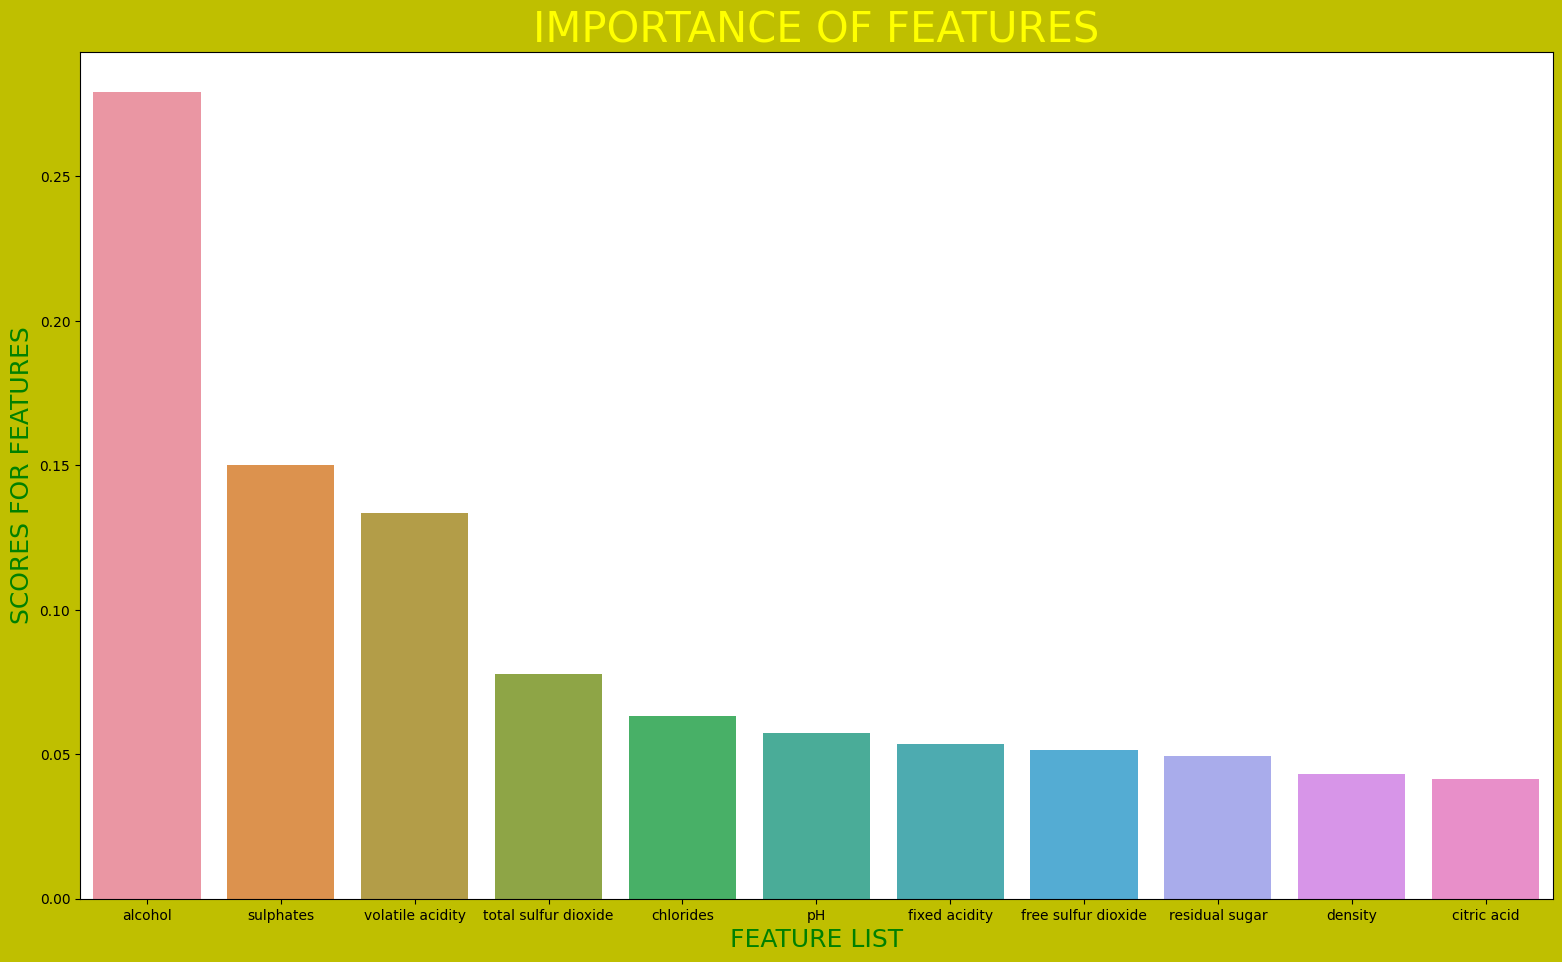

In [274]:
# PLOT DETAILS
plt.rcParams['figure.figsize'] = (19, 11)
plt.rcParams['figure.facecolor'] = 'y'
plt.rcParams['figure.edgecolor'] = 'r'

sns.barplot(x = importantFeat.index, y = importantFeat)
plt.xlabel('FEATURE LIST', size = 18, color = 'GREEN')
plt.ylabel('SCORES FOR FEATURES', size = 18, color = 'GREEN')
plt.title('IMPORTANCE OF FEATURES', size = 30, color = 'YELLOW')
plt.show()

In [275]:
# 4.5 What is the performance of the RF model and compare it with the linear regression and KNN models constructed during Assignment 6.
# Present sufficient information to support your conclusion about the best model for the red wine dataset.

# OPTIMAL NUMBER OF TREES MODEL
rfClassf = RandomForestRegressor(n_estimators = 147, random_state = 20).fit(xRedTrain, yRedTrain)
rfPredict = rfClassf.predict(xRedTest)
rfMSE = mean_squared_error(yRedTest, rfPredict)
print(f"THE RANDOM FOREST MODEL'S MSE IS {rfMSE}")

# LINEAR REGRESSION MODEL
LinRegrModel = LinearRegression().fit(xRedTrain, yRedTrain)
regrPredict = LinRegrModel.predict(xRedTest)
regrMSE = mean_squared_error(yRedTest, regrPredict)
print(f"THE LINEAR REGRESSION MODEL'S MSE IS {regrMSE}")

# KNN MODEL
knnModel = KNeighborsClassifier().fit(xRedTrain, yRedTrain)
predKNN = knnModel.predict(xRedTest)
knnMSE = mean_squared_error(yRedTest, predKNN)
print(f"THE KNN MODEL'S MSE IS {knnMSE}")


THE RANDOM FOREST MODEL'S MSE IS 0.31842577166921193
THE LINEAR REGRESSION MODEL'S MSE IS 0.38447119782012495
THE KNN MODEL'S MSE IS 0.671875
